#Import Data

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [6]:
# load data
import os
from google.colab import drive
drive.mount('/content/drive')
filedir = './drive/My Drive/Final/CNN_data'
with open(filedir + '/' + 'feature_extracted', 'rb') as f:
  X = np.load(f)
with open(filedir + '/' + 'Y', 'rb') as f:
  Y = np.load(f).astype(np.int32)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# import MFCC data
with open('./drive/My Drive/Final/mfcc_data/X', 'rb') as f:
  X_mfcc = np.load(f)
with open('./drive/My Drive/Final/mfcc_data/Y', 'rb') as f:
  Y_mfcc = np.load(f)
print('X_shape: {}\nY_shape: {}'.format(X_mfcc.shape, Y_mfcc.shape))

X_shape: (300, 756)
Y_shape: (300,)


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
'''
X_new = np.zeros([300,0])
for i in range(X.shape[1]):
  col = X[:,i,None]
  if((np.abs(col) > 1e-6).any()):
    X_new = np.hstack([X_new, col])
  else:
    print('Yes')
print('X.shape: {}\nX_new.shape: {}\nY.shape: {}'.format(X.shape, X_new.shape, Y.shape))

print(X_new.shape)
print(np.max(X_new, axis=1) != np.max(X, axis=1))
print(np.min(X_new, axis=1))
'''

"\nX_new = np.zeros([300,0])\nfor i in range(X.shape[1]):\n  col = X[:,i,None]\n  if((np.abs(col) > 1e-6).any()):\n    X_new = np.hstack([X_new, col])\n  else:\n    print('Yes')\nprint('X.shape: {}\nX_new.shape: {}\nY.shape: {}'.format(X.shape, X_new.shape, Y.shape))\n\nprint(X_new.shape)\nprint(np.max(X_new, axis=1) != np.max(X, axis=1))\nprint(np.min(X_new, axis=1))\n"

#CLF1 Ridge Classifier

In [10]:
'''
from sklearn.linear_model import RidgeClassifier
parameters = {'alpha':[1]}
rc = RidgeClassifier(alpha = 1)
clf = GridSearchCV(rc, parameters, cv=3)
clf.fit(X[:30], Y[:30])

clf.best_estimator_.fit(X[:30], Y[:30]).score(X, Y)
clf.best_index_
'''

"\nfrom sklearn.linear_model import RidgeClassifier\nparameters = {'alpha':[1]}\nrc = RidgeClassifier(alpha = 1)\nclf = GridSearchCV(rc, parameters, cv=3)\nclf.fit(X[:30], Y[:30])\n\nclf.best_estimator_.fit(X[:30], Y[:30]).score(X, Y)\nclf.best_index_\n"

In [0]:
from sklearn.linear_model import RidgeClassifier
def clf_RidgeClassifier(training_set, training_lable, testing_set, testing_lable):
  parameters = {'alpha':[10, 1, 1e-1, 1e-2, 1e-3]}
  rc = RidgeClassifier(alpha = 1)
  clf = GridSearchCV(rc, parameters, cv=3, return_train_score=True, iid=False)
  clf.fit(training_set, training_lable)
  results = clf.cv_results_
  opt_index = clf.best_index_
  training_score = results['mean_train_score'][opt_index]
  validation_score = results['mean_test_score'][opt_index]
  testing_score = clf.best_estimator_.fit(training_set, training_lable).score(testing_set, testing_lable)
  return [training_score, validation_score, testing_score], clf.best_params_

In [12]:
clf_RidgeClassifier(X[:240], Y[:240], X[240:], Y[240:])

([1.0, 0.9208333333333334, 0.95], {'alpha': 10})

#CLF2 SVM

In [0]:
from sklearn.svm import SVC
def clf_SVM(X_train, Y_train, X_test, Y_test):
  parameters = {'C':[10, 1, 1e-1, 1e-2, 1e-3]}
  svc = SVC(kernel='linear')
  clf = GridSearchCV(svc, parameters, cv=3, return_train_score=True, iid=False)
  clf.fit(X_train, Y_train)
  results = clf.cv_results_
  opt_index = clf.best_index_
  training_score = results['mean_train_score'][opt_index]
  validation_score = results['mean_test_score'][opt_index]
  testing_score = clf.best_estimator_.fit(X_train, Y_train).score(X_test, Y_test)
  return [training_score, validation_score, testing_score], clf.best_params_

In [14]:
clf_SVM(X[:240], Y[:240], X[240:], Y[240:])

([0.9979166666666667, 0.9583333333333334, 0.95], {'C': 0.1})

#CLF3 LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def clf_lda(Xtrain, Ytrain, Xtest, Ytest):
  """
  Input: training data, labels, testing data, labels
  Output: training set mean prediciton accuracy, validation accuracy = None, testing set mean prediction accuracy
  
  Note: LDA has no hyperparameters to tune because a model is solved in closed form
        therefore there is no need for model selection via grid search cross validation
        therefore there is no validation accuracy
  """
  clf = LinearDiscriminantAnalysis()
  clf.fit(Xtrain, Ytrain)
  
  
  train_acc = clf.score(Xtrain,Ytrain)
  val_acc = None
  test_acc = clf.score(Xtest,Ytest)
  return [train_acc,val_acc,test_acc], None

In [16]:
clf_lda(X[:240],Y[:240],X[240:],Y[240:])

([1.0, None, 0.65], None)

#CLF4 KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def clf_KNN(X_train, Y_train, X_test, Y_test):
  parameters = {'n_neighbors':[1,5,20]}
  knn = KNeighborsClassifier(algorithm='auto', weights='uniform')
  clf = GridSearchCV(knn, parameters, cv=3, return_train_score=True, iid=False)
  clf.fit(X_train, Y_train)
  results = clf.cv_results_
  opt_index = clf.best_index_
  training_score = results['mean_train_score'][opt_index]
  validation_score = results['mean_test_score'][opt_index]
  testing_score = clf.best_estimator_.fit(X_train, Y_train).score(X_test, Y_test)
  return [training_score, validation_score, testing_score], clf.best_params_

In [18]:
clf_KNN(X[:240], Y[:240], X[240:], Y[240:])

([1.0, 0.9083333333333333, 0.7666666666666667], {'n_neighbors': 1})

#CLF5 Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
def clf_DecisionTree(X_train, Y_train, X_test, Y_test):
  parameters = {'max_depth':[5,10,15,20,25], 'criterion':['entropy', 'gini']}
  dtc = DecisionTreeClassifier()
  clf = GridSearchCV(dtc, parameters, cv=3, return_train_score=True, iid=False)
  clf.fit(X_train, Y_train)
  results = clf.cv_results_
  opt_index = clf.best_index_
  training_score = results['mean_train_score'][opt_index]
  validation_score = results['mean_test_score'][opt_index]
  testing_score = clf.best_estimator_.fit(X_train, Y_train).score(X_test, Y_test)
  return [training_score, validation_score, testing_score], clf.best_params_

In [20]:
clf_DecisionTree(X[:240], Y[:240], X[240:], Y[240:])

([1.0, 0.9166666666666666, 0.9], {'criterion': 'entropy', 'max_depth': 10})

#Testing On Data

In [0]:
clf_list = [clf_RidgeClassifier, clf_SVM, clf_lda, clf_KNN, clf_DecisionTree]
def test_trial(X_shuffled, Y_shuffled):
  global clf_list
  error = np.zeros((3,5,3)) # partition(3) * clf(5) * error(3)
                            # (8/2,5/5,2/8) * (clf_list) * (trn,val,tst)
  opt_param = np.empty((3,5), dtype=dict) # partition(3) * clf(5)
  sample_size = len(X_shuffled)
  # 80/20 split
  train_size = int(sample_size * 0.8)
  X_train = X_shuffled[:train_size]
  Y_train = Y_shuffled[:train_size]
  X_test = X_shuffled[train_size:]
  Y_test = Y_shuffled[train_size:]
  for i in range(len(clf_list)):
    clffn = clf_list[i]
    error[0,i,:], opt_param[0,i] = clffn(X_train, Y_train, X_test, Y_test)
  # 50/50 split
  train_size = int(sample_size * 0.5)
  X_train = X_shuffled[:train_size]
  Y_train = Y_shuffled[:train_size]
  X_test = X_shuffled[train_size:]
  Y_test = Y_shuffled[train_size:]
  for i in range(len(clf_list)):
    clffn = clf_list[i]
    error[1,i,:], opt_param[1,i] = clffn(X_train, Y_train, X_test, Y_test)
  # 80/20 split
  train_size = int(sample_size * 0.2)
  X_train = X_shuffled[:train_size]
  Y_train = Y_shuffled[:train_size]
  X_test = X_shuffled[train_size:]
  Y_test = Y_shuffled[train_size:]
  for i in range(len(clf_list)):
    clffn = clf_list[i]
    error[2,i,:], opt_param[2,i] = clffn(X_train, Y_train, X_test, Y_test)
  # return error array
  return error, opt_param

In [0]:
from sklearn.utils import shuffle
def test_data(X, Y):
  error = np.zeros((3,3,5,3)) # trial(3) * error_from_test_trial(3*5*3)
  opt_param = np.empty((3,3,5), dtype=dict) # trial(3) * opt_param_from_test_trial(3*5)
  # trial 1
  X_shuffled, Y_shuffled = shuffle(X, Y)
  error[0], opt_param[0] = test_trial(X_shuffled, Y_shuffled)
  # trial 2
  X_shuffled, Y_shuffled = shuffle(X_shuffled, Y_shuffled)
  error[1], opt_param[1] = test_trial(X_shuffled, Y_shuffled)
  # trial 3
  X_shuffled, Y_shuffled = shuffle(X_shuffled, Y_shuffled)
  error[2], opt_param[2] = test_trial(X_shuffled, Y_shuffled)
  return error, opt_param

In [0]:
# test on CNN-extracted features
acc_CNN, opt_param_CNN = test_data(X, Y)

In [19]:
np.mean(acc_CNN[:,:,:,:], axis=0)

array([[[0.99930556, 0.96107204, 0.93888889],
        [0.99861542, 0.96801822, 0.95      ],
        [0.99861111,        nan, 0.77222222],
        [1.        , 0.93058464, 0.92777778],
        [1.        , 0.92784116, 0.9       ]],

       [[1.        , 0.93549598, 0.94444444],
        [0.98553222, 0.95545596, 0.95555556],
        [0.99777778,        nan, 0.87111111],
        [1.        , 0.92402383, 0.93777778],
        [1.        , 0.91971544, 0.88666667]],

       [[1.        , 0.92857143, 0.89444444],
        [0.98888889, 0.9452381 , 0.93472222],
        [1.        ,        nan, 0.80833333],
        [1.        , 0.90661376, 0.88055556],
        [1.        , 0.92883598, 0.87222222]]])

In [0]:
acc_clf, opt_param = test_data(X_mfcc, Y_mfcc)

In [22]:
avg_cnn_acc = np.mean(acc_CNN, axis=0)
avg_clf_acc = np.mean(acc_clf, axis=0)
print('cnn: {}'.format(avg_cnn_acc))
print('clf: {}'.format(avg_clf_acc))

cnn: [[[0.99930556 0.96107204 0.93888889]
  [0.99861542 0.96801822 0.95      ]
  [0.99861111        nan 0.77222222]
  [1.         0.93058464 0.92777778]
  [1.         0.92784116 0.9       ]]

 [[1.         0.93549598 0.94444444]
  [0.98553222 0.95545596 0.95555556]
  [0.99777778        nan 0.87111111]
  [1.         0.92402383 0.93777778]
  [1.         0.91971544 0.88666667]]

 [[1.         0.92857143 0.89444444]
  [0.98888889 0.9452381  0.93472222]
  [1.                nan 0.80833333]
  [1.         0.90661376 0.88055556]
  [1.         0.92883598 0.87222222]]]
clf: [[[1.         0.9860931  0.97777778]
  [1.         0.99166623 0.99444444]
  [1.                nan 0.98888889]
  [0.99514309 0.98887131 1.        ]
  [1.         0.9597385  0.9       ]]

 [[1.         0.98679739 0.99333333]
  [1.         0.98901961 0.99555556]
  [1.                nan 0.99333333]
  [1.         0.97332978 0.99555556]
  [1.         0.92460807 0.94222222]]

 [[1.         0.96637427 0.99444444]
  [1.         0.96

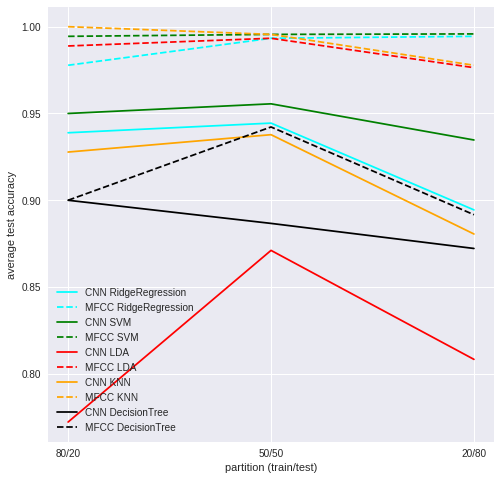

In [23]:
# partition_accuracy plot
from matplotlib import rcParams
rcParams['figure.figsize'] = (8,8)
colors = ['cyan', 'green', 'red', 'orange','black']
clf = ['RidgeRegression', 'SVM', 'LDA', 'KNN', 'DecisionTree']
for clfid in range(5):
  plt.plot(avg_cnn_acc[:,clfid,-1], color=colors[clfid], linestyle='solid', label='CNN '+clf[clfid])
  plt.plot(avg_clf_acc[:,clfid,-1], color=colors[clfid], linestyle='dashed', label='MFCC '+clf[clfid])
plt.legend(loc='lower left')
plt.xticks((0,1,2),['80/20', '50/50', '20/80'])
plt.xlabel('partition (train/test)')
plt.ylabel('average test accuracy')
plt.savefig('./drive/My Drive/Final/graphs/partition_accuracy.png', bbox='tight')

In [0]:
# SVM hyperparameter error plot

parameters = {'C':[10, 1, 1e-1, 1e-2, 1e-3]}
svc = SVC(kernel='linear')
clf = GridSearchCV(svc, parameters, cv=3, return_train_score=True, iid=False)
clf.fit(X[:240], Y[:240])
results = clf.cv_results_
opt_index = clf.best_index_
training_score = results['mean_train_score']
validation_score = results['mean_test_score']


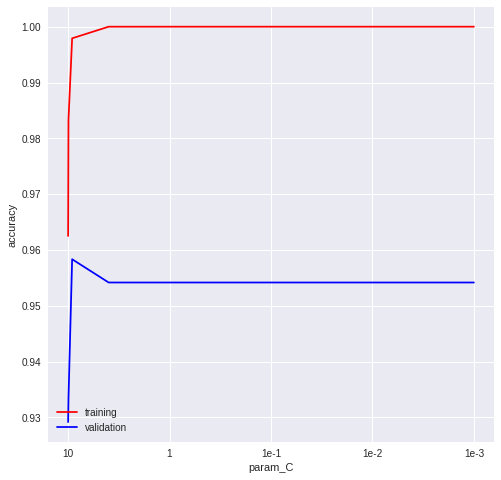

In [26]:
param_x = results['param_C'].data.astype(np.float32)
plt.plot(param_x, training_score, 'r-', label='training')
plt.plot(param_x, validation_score, 'b-', label='validation')
plt.legend(loc='lower left')
plt.xticks([0,2.5,5,7.5,10], ['10','1','1e-1','1e-2','1e-3'])
plt.xlabel('param_C')
plt.ylabel('accuracy')
#plt.show()
plt.savefig('./drive/My Drive/Final/graphs/SVM_hyperparameter_accuracy.png')

In [27]:
# avg cross-partition accuracy
cnn_cp_acc = np.mean(avg_cnn_acc[:,:,-1], axis=0)
clf_cp_acc = np.mean(avg_clf_acc[:,:,-1], axis=0)
print('cnn_cp_acc: {}'.format(cnn_cp_acc))
print('clf_cp_acc: {}'.format(clf_cp_acc))

cnn_cp_acc: [0.92592593 0.94675926 0.81722222 0.91537037 0.8862963 ]
clf_cp_acc: [0.98851852 0.99527778 0.9862037  0.99111111 0.9112963 ]


In [29]:
avg_totalcp_acc = (cnn_cp_acc + clf_cp_acc) / 2
print(avg_totalcp_acc)

[0.95722222 0.97101852 0.90171296 0.95324074 0.8987963 ]


In [30]:
(avg_cnn_acc + avg_clf_acc)/2

array([[[0.99965278, 0.97358257, 0.95833333],
        [0.99930771, 0.97984223, 0.97222222],
        [0.99930556,        nan, 0.88055556],
        [0.99757155, 0.95972797, 0.96388889],
        [1.        , 0.94378983, 0.9       ]],

       [[1.        , 0.96114668, 0.96888889],
        [0.99276611, 0.97223778, 0.97555556],
        [0.99888889,        nan, 0.93222222],
        [1.        , 0.9486768 , 0.96666667],
        [1.        , 0.92216175, 0.91444444]],

       [[1.        , 0.94747285, 0.94444444],
        [0.99444444, 0.9530284 , 0.96527778],
        [0.98333333,        nan, 0.89236111],
        [1.        , 0.92814676, 0.92916667],
        [1.        , 0.90604288, 0.88194444]]])

In [31]:
opt_param

array([[[{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'entropy', 'max_depth': 10}],
        [{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'gini', 'max_depth': 5}],
        [{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'gini', 'max_depth': 10}]],

       [[{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'entropy', 'max_depth': 10}],
        [{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'gini', 'max_depth': 15}],
        [{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'entropy', 'max_depth': 25}]],

       [[{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 5},
         {'criterion': 'entropy', 'max_depth': 20}],
        [{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'entropy', 'max_depth': 20}],
        [{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'entropy',

In [32]:
opt_param_CNN

array([[[{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'entropy', 'max_depth': 5}],
        [{'alpha': 10}, {'C': 0.01}, None, {'n_neighbors': 1},
         {'criterion': 'entropy', 'max_depth': 10}],
        [{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'gini', 'max_depth': 15}]],

       [[{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'gini', 'max_depth': 20}],
        [{'alpha': 10}, {'C': 10}, None, {'n_neighbors': 1},
         {'criterion': 'entropy', 'max_depth': 15}],
        [{'alpha': 10}, {'C': 0.01}, None, {'n_neighbors': 1},
         {'criterion': 'gini', 'max_depth': 5}]],

       [[{'alpha': 10}, {'C': 0.1}, None, {'n_neighbors': 1},
         {'criterion': 'entropy', 'max_depth': 20}],
        [{'alpha': 0.1}, {'C': 0.01}, None, {'n_neighbors': 1},
         {'criterion': 'gini', 'max_depth': 5}],
        [{'alpha': 10}, {'C': 0.01}, None, {'n_neighbors': 1},
         {'criterion': 'entr

In [0]:
max_ind_cnn = np.argpartition(np.sum(X, axis=0), -2)[-2:]
std_ind_cnn = np.argpartition(np.std(X, axis=0), -2)[-2:]
max_ind_clf = np.argpartition(np.sum(X_mfcc, axis=0), -2)[-2:]
std_ind_clf = np.argpartition(np.std(X_mfcc, axis=0), -2)[-2:]

In [0]:
max_cnn = X[:,max_ind_cnn]
std_cnn = X[:,std_ind_cnn]
max_clf = X_mfcc[:,max_ind_clf]
std_clf = X_mfcc[:,std_ind_clf]

In [0]:
def plot_features(X, Y):
  return X[Y==0,:], X[Y==1,:]

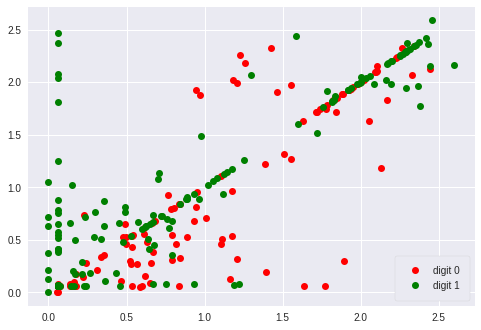

In [26]:
# 2 max features from cnn plotted
plt.clf()
feature0, feature1 = plot_features(max_cnn, Y)
plt.plot(feature0[:,0], feature0[:,1],'ro', label='digit 0')
plt.plot(feature1[:,0], feature1[:,1],'go', label='digit 1')
plt.legend(loc='lower right')
plt.show()
#plt.savefig('./drive/My Drive/Final/graphs/2_max_sum_cnn_features.png')

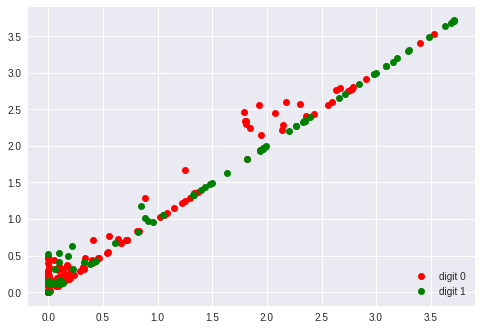

In [27]:
# 2 var features from cnn plotted
feature0, feature1 = plot_features(std_cnn, Y)
plt.plot(feature0[:,0], feature0[:,1],'ro', label='digit 0')
plt.plot(feature1[:,0], feature1[:,1],'go', label='digit 1')
plt.legend(loc='lower right')
#plt.show()
plt.savefig('./drive/My Drive/Final/graphs/2_max_var_cnn_features.png')

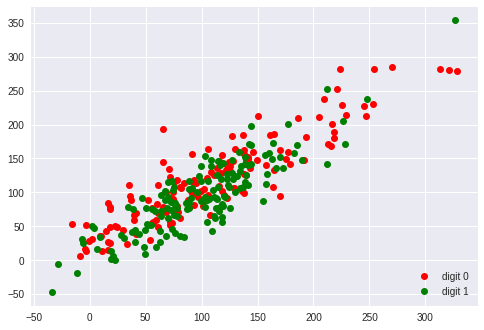

In [28]:
# 2 max features from mfcc plotted
feature0, feature1 = plot_features(max_clf, Y)
plt.plot(feature0[:,0], feature0[:,1],'ro', label='digit 0')
plt.plot(feature1[:,0], feature1[:,1],'go', label='digit 1')
plt.legend(loc='lower right')
#plt.show()
plt.savefig('./drive/My Drive/Final/graphs/2_max_sum_mfcc_features.png')

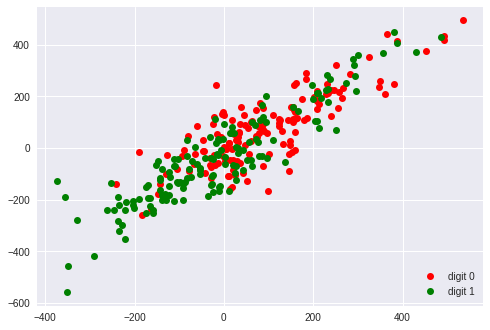

In [29]:
# 2 var features from mfcc plotted
feature0, feature1 = plot_features(std_clf, Y)
plt.plot(feature0[:,0], feature0[:,1],'ro', label='digit 0')
plt.plot(feature1[:,0], feature1[:,1],'go', label='digit 1')
plt.legend(loc='lower right')
#plt.show()
plt.savefig('./drive/My Drive/Final/graphs/2_max_var_mfcc_features.png')